✅ Dataset: /content/frames.zip
✅ Labels: /content/updated.xlsx
✅ Found 1232 images
✅ Excel columns: ['filename', 'upright', 'leaning_forward', 'leaning_left', 'leaning_right', 'leaning_backward']
📊 First rows:
                  filename  upright  leaning_forward  leaning_left  \
0  darshan_frame_0006.png        0                1             0   
1  darshan_frame_0007.png        0                1             0   
2  darshan_frame_0008.png        0                1             0   
3  darshan_frame_0009.png        0                1             0   
4  darshan_frame_0012.png        0                1             0   

   leaning_right  leaning_backward  
0              0                 0  
1              0                 0  
2              0                 0  
3              0                 0  
4              0                 0  
✅ Matching by 'filename' column
✅ Processed 1188 images
X shape: (1188, 224, 224, 3), y shape: (1188, 5)
Train: 950, Validation: 238


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.2859 - loss: 0.7419 - val_accuracy: 0.5378 - val_loss: 0.4346
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.4675 - loss: 0.4438 - val_accuracy: 0.5756 - val_loss: 0.3534
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.6148 - loss: 0.3683 - val_accuracy: 0.6933 - val_loss: 0.2906
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.6312 - loss: 0.3406 - val_accuracy: 0.7017 - val_loss: 0.2588
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7118 - loss: 0.2732 - val_accuracy: 0.7437 - val_loss: 0.2367
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.7694 - loss: 0.2444 - val_accuracy: 0.7857 - val_loss: 0.2221
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.7954 - loss: 0.2121 - val_accuracy: 0.7983 - val_loss: 0.2006
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8269 - loss: 0.1750 - val_accuracy: 0.8067 - val

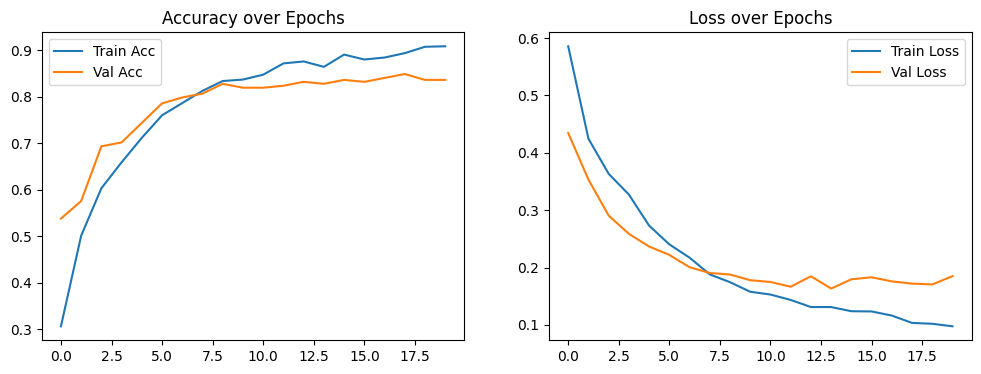

✅ Model saved as posture_detection_model.h5
✅ Training history saved as training_history.csv


In [ ]:
# ============================
# Posture Detection Training Script
# ============================

# Step 1: Install dependencies (only needed once if not installed)
# !pip install tensorflow scikit-learn opencv-python Pillow matplotlib numpy pandas openpyxl

import os
import zipfile
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ----------------------------
# Step 2: File paths
# ----------------------------
frames_zip = "frames.zip"         # <-- put your 1000+ frames zip here
labels_file = "updated.xlsx"      # <-- your Excel with labels

# Adjust paths if running in Colab
if "COLAB_GPU" in os.environ:
    frames_zip = "/content/frames.zip"
    labels_file = "/content/updated.xlsx"

# Check files exist
if not os.path.exists(frames_zip):
    raise FileNotFoundError(f"❌ {frames_zip} not found")
if not os.path.exists(labels_file):
    raise FileNotFoundError(f"❌ {labels_file} not found")

print(f"✅ Dataset: {frames_zip}")
print(f"✅ Labels: {labels_file}")

# ----------------------------
# Step 3: Extract frames
# ----------------------------
extract_dir = "extracted_frames"
if os.path.exists(extract_dir):
    import shutil
    shutil.rmtree(extract_dir)
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(frames_zip, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

# Collect images
image_files = glob.glob(os.path.join(extract_dir, "**", "*.*"), recursive=True)
image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
image_files = sorted(image_files)

if not image_files:
    raise ValueError("❌ No images found in frames.zip")
print(f"✅ Found {len(image_files)} images")

# ----------------------------
# Step 4: Load Excel labels
# ----------------------------
df = pd.read_excel(labels_file, engine="openpyxl")
df.columns = [c.strip().lower().replace(" ", "") for c in df.columns]

label_columns = ['upright', 'leaning_forward', 'leaning_backward', 'leaning_left', 'leaning_right']
if not all(col in df.columns for col in label_columns):
    raise ValueError(f"❌ Missing required label columns. Found: {df.columns.tolist()}")

print("✅ Excel columns:", df.columns.tolist())
print("📊 First rows:\n", df.head())

# ----------------------------
# Step 5: Match images with labels
# ----------------------------
X, y = [], []

if "filename" in df.columns:
    print("✅ Matching by 'filename' column")
    label_dict = df.set_index("filename")[label_columns].to_dict(orient="index")
    for img_path in image_files:
        fname = os.path.basename(img_path)
        if fname in label_dict:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            img = img / 255.0
            X.append(img)
            y.append(list(label_dict[fname].values()))
else:
    print("⚠️ No filename column, matching by order")
    if len(image_files) != len(df):
        raise ValueError(f"❌ Mismatch: {len(image_files)} images vs {len(df)} rows in Excel")
    for i, img_path in enumerate(image_files):
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img / 255.0
        X.append(img)
        y.append(df.iloc[i][label_columns].values)

X = np.array(X)
y = np.array(y)

print(f"✅ Processed {len(X)} images")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# ----------------------------
# Step 6: Split train/val
# ----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train: {len(X_train)}, Validation: {len(X_val)}")

# ----------------------------
# Step 7: Build CNN model
# ----------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="sigmoid")  # 5 posture classes
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ----------------------------
# Step 8: Train model
# ----------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# ----------------------------
# Step 9: Plot training curves
# ----------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()

# ----------------------------
# Step 10: Save model + history
# ----------------------------
model.save("posture_detection_model.h5")
print("✅ Model saved as posture_detection_model.h5")

pd.DataFrame(history.history).to_csv("training_history.csv", index=False)
print("✅ Training history saved as training_history.csv")

In [ ]:
# ----------------------------
# Step 8.5: Evaluate model and print accuracy
# ----------------------------
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Validation Accuracy: {acc * 100:.2f}%")


✅ Validation Accuracy: 83.61%


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9193 - loss: 0.0861 - val_accuracy: 0.8403 - val_loss: 0.1653
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.9233 - loss: 0.0742 - val_accuracy: 0.8403 - val_loss: 0.1637
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.9197 - loss: 0.0885 - val_accuracy: 0.8403 - val_loss: 0.1816
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9272 - loss: 0.0763 - val_accuracy: 0.8529 - val_loss: 0.1656
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.9229 - loss: 0.0782 - val_accuracy: 0.8613 - val_loss: 0.1675
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.9225 - loss: 0.0738 - val_accuracy: 0.8655 - val_loss: 0.1780
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9291 - loss: 0.0751 - val_accuracy: 0.8571 - val_loss: 0.1889
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9464 - loss: 0.0677 - val_accuracy: 0.8487 - val

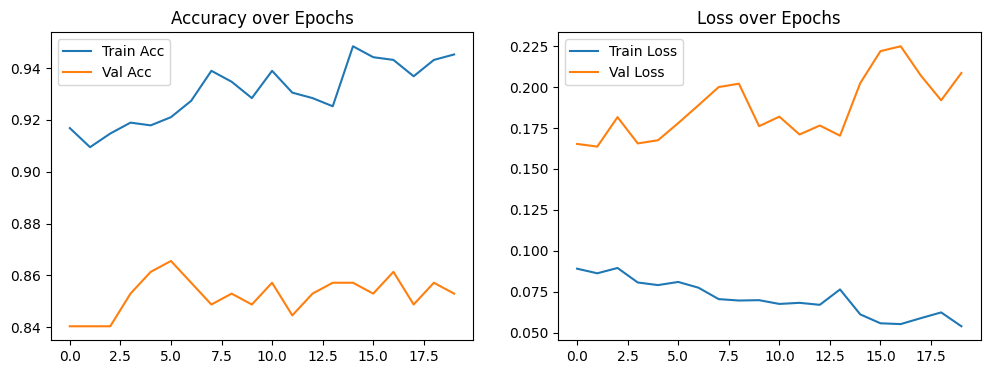

✅ Model saved as posture_detection_model.h5
✅ Training history saved as training_history.csv


In [ ]:
# ----------------------------
# Step 8: Train model
# ----------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# ----------------------------
# Step 8.5: Evaluate model and print accuracy
# ----------------------------
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Validation Accuracy: {acc * 100:.2f}%")

# ----------------------------
# Step 9: Plot training curves
# ----------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()

# ----------------------------
# Step 10: Save model + history
# ----------------------------
model.save("posture_detection_model.h5")
print("✅ Model saved as posture_detection_model.h5")

pd.DataFrame(history.history).to_csv("training_history.csv", index=False)
print("✅ Training history saved as training_history.csv")


In [ ]:
# =============================
# Posture Detection - Inference
# =============================

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("posture_detection_model.h5")

# Define class labels (must match training order)
labels = ['Upright', 'Leaning Forward', 'Leaning Backward', 'Leaning Left', 'Leaning Right']

# Start webcam
# This code requires access to a webcam, which is not possible in Google Colab's cloud environment.
# To run this code, download the notebook and execute it in a local Python environment
# on a machine with a webcam.
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    # This error is expected in Colab because it cannot access your local webcam.
    raise IOError("❌ Cannot access webcam. This code needs to be run locally with a webcam.")

print("✅ Webcam started. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("⚠️ Failed to grab frame")
        break

    # Preprocess frame (resize + normalize)
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224)) / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)  # add batch dimension

    # Predict
    preds = model.predict(img_resized)[0]
    predicted_idx = np.argmax(preds)
    predicted_label = labels[predicted_idx]
    confidence = preds[predicted_idx]

    # Draw result on frame
    cv2.putText(frame, f"{predicted_label} ({confidence:.2f})",
                (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show webcam feed
    # cv2.imshow is a GUI function and will not work in Google Colab.
    # To see the output, run this code locally.
    cv2.imshow("Posture Detection", frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

OSError: ❌ Cannot access webcam. This code needs to be run locally with a webcam.

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
# tkinter is a GUI library and will not work in Google Colab.
# import tkinter as tk
# from PIL import Image, ImageTk

# Load trained model
model = load_model("posture_detection_model.h5")
labels = ['Upright', 'Leaning Forward', 'Leaning Backward', 'Leaning Left', 'Leaning Right']

# Initialize webcam
# This code requires access to a webcam, which is not possible in Google Colab's cloud environment.
# To run this code, download the notebook and execute it in a local Python environment
# on a machine with a webcam.
cap = cv2.VideoCapture(0)

# Tkinter window
# Tkinter is a GUI library and will not work in Google Colab.
# window = tk.Tk()
# window.title("Posture Detection")

# lmain = tk.Label(window)
# lmain.pack()

def show_frame():
    ret, frame = cap.read()
    if ret:
        # Preprocess
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (224, 224)) / 255.0
        img_resized = np.expand_dims(img_resized, axis=0)

        preds = model.predict(img_resized)[0]
        predicted_idx = np.argmax(preds)
        predicted_label = labels[predicted_idx]
        confidence = preds[predicted_idx]

        # Draw text on frame
        cv2.putText(frame, f"{predicted_label} ({confidence:.2f})",
                    (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Convert to Tkinter image
        # This part of the code is for displaying the feed in a Tkinter window,
        # which will not work in Google Colab.
        # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # img = Image.fromarray(img)
        # imgtk = ImageTk.PhotoImage(image=img)
        # lmain.imgtk = imgtk
        # lmain.configure(image=imgtk)

    # This part is for updating the Tkinter window.
    # lmain.after(10, show_frame)

# show_frame()
# window.mainloop()
cap.release()